Total cropped frames: 22380
Height: min=288, max=1070, mean=964.4
Width: min=298, max=1853, mean=462.7


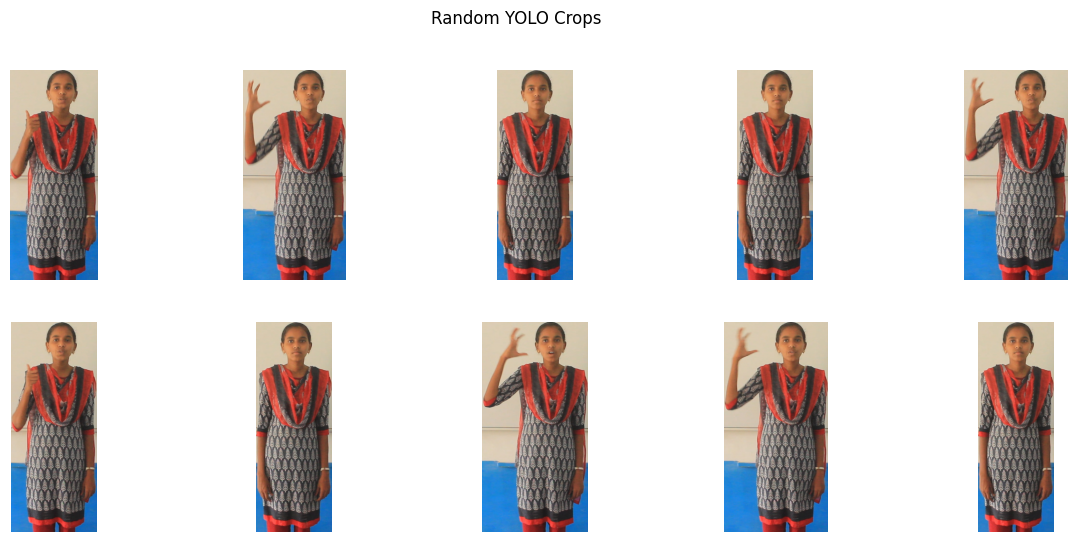

In [1]:
# notebooks/data_checks.ipynb

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

CROPS_DIR = "../data/yolo_crops" 

# 1️⃣ Collect all crops info
shapes = []
sample_imgs = []

for root, _, files in os.walk(CROPS_DIR):
    for f in files:
        if f.endswith(".jpg"):
            img = cv2.imread(os.path.join(root, f))
            if img is None:
                continue
            h, w, _ = img.shape
            shapes.append((h, w))
            if len(sample_imgs) < 10:
                sample_imgs.append(img)

print(f"Total cropped frames: {len(shapes)}")

# 2️⃣ Basic stats
heights = [s[0] for s in shapes]
widths = [s[1] for s in shapes]

print(f"Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.1f}")
print(f"Width: min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.1f}")

# 3️⃣ Show samples
plt.figure(figsize=(15, 6))
for i, img in enumerate(sample_imgs):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
plt.suptitle("Random YOLO Crops")
plt.show()


In [5]:
import numpy as np

X = np.load('../data/landmarks/X.npy')
y = np.load('../data/landmarks/y.npy')

print(f"X shape: {X.shape}")  # should be (373, 60, 543, 4)
print(f"y shape: {y.shape}")  # should be (373,)

print(f"Unique labels: {np.unique(y)}")
print(f"Number of unique labels: {len(np.unique(y))}")


X shape: (373, 60, 543, 4)
y shape: (373,)
Unique labels: ['Alright' 'Bad' 'Beautiful' 'Blind' 'Deaf' 'Good' 'Good afternoon'
 'Good morning' 'He' 'Hello' 'How are you' 'I' 'IT' 'Loud' 'Quiet' 'Sad'
 'She' 'Ugly' 'You' 'happy']
Number of unique labels: 20


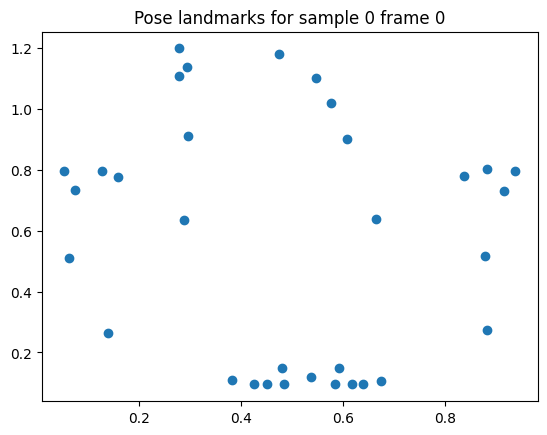

Label: 0.12022929638624191


In [7]:
import matplotlib.pyplot as plt

sample_idx = 0  # pick any valid index
sample_sequence = X[sample_idx]  # shape: (60, 543, 4)

# Pick a single frame from the sequence
frame_idx = 0
frame_landmarks = sample_sequence[frame_idx]

# Plot pose landmarks as example
pose_landmarks = frame_landmarks[:33]  # first 33 are pose
x = pose_landmarks[:, 0]
y = pose_landmarks[:, 1]

plt.scatter(x, y)
plt.title(f"Pose landmarks for sample {sample_idx} frame {frame_idx}")
plt.show()

print(f"Label: {y[sample_idx]}")


In [8]:
zero_counts = np.sum(X == 0)
total_points = np.prod(X.shape)
print(f"Zero points: {zero_counts}/{total_points} → {100 * zero_counts/total_points:.2f}%")


Zero points: 12323304/48609360 → 25.35%


In [9]:
import numpy as np

X = np.load('../data/landmarks/X.npy')
zero_ratio_per_landmark = np.mean(X == 0, axis=(0,1,3))  # (543,)
print("Landmark-wise zero ratio:", zero_ratio_per_landmark)


Landmark-wise zero ratio: [0.00201072 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072
 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072
 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072
 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072
 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072 0.00201072
 0.00201072 0.00201072 0.00201072 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898 0.26105898
 0.26105898 0.26105898 0.26105898 0.

Label counts:
Alright: 19
Bad: 20
Beautiful: 13
Blind: 20
Deaf: 15
Good: 20
Good afternoon: 20
Good morning: 20
He: 20
Hello: 20
How are you: 20
I: 20
IT: 20
Loud: 20
Quiet: 20
Sad: 13
She: 20
Ugly: 13
You: 20
happy: 20


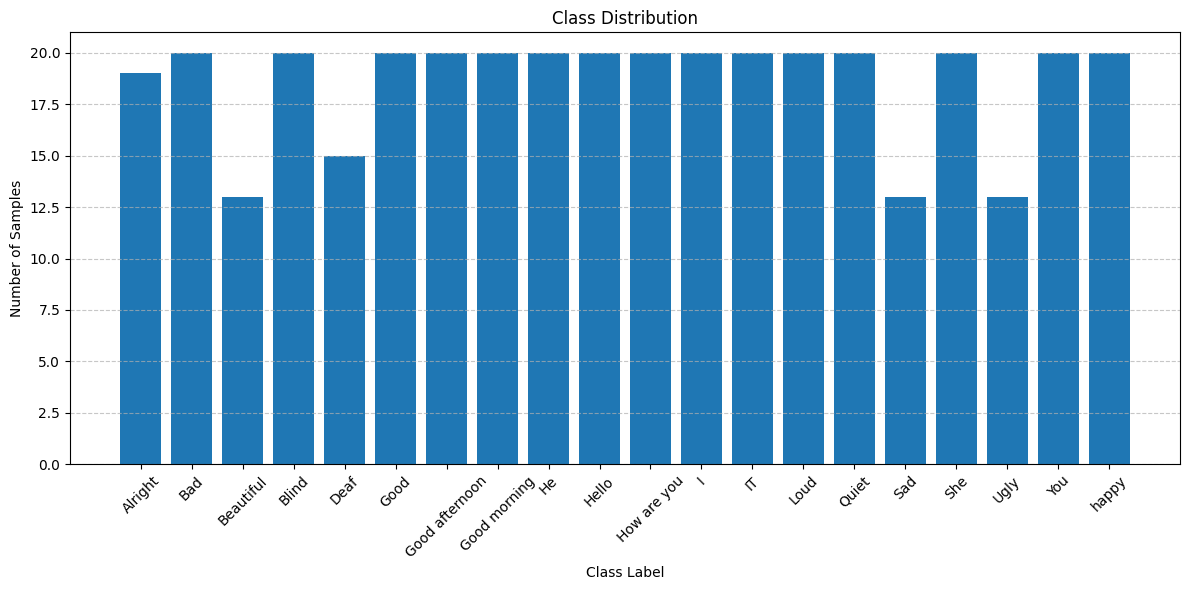

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load your final labels
y = np.load("../data/landmarks/y.npy")

# Check unique label counts
unique_labels, counts = np.unique(y, return_counts=True)

print("Label counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(unique_labels, counts)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

y = np.load('../data/landmarks/y.npy')
print(np.unique(y, return_counts=True))

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(np.unique(y_encoded))


(array(['Alright', 'Bad', 'Beautiful', 'Blind', 'Deaf', 'Good',
       'Good afternoon', 'Good morning', 'He', 'Hello', 'How are you',
       'I', 'IT', 'Loud', 'Quiet', 'Sad', 'She', 'Ugly', 'You', 'happy'],
      dtype='<U14'), array([19, 20, 13, 20, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 13, 20,
       13, 20, 20]))
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [15]:
import numpy as np

X = np.load('../data/landmarks/X_balanced.npy')
y = np.load('../data/landmarks/y_balanced.npy')

print("X shape:", X.shape)
print("y shape:", y.shape)

# Pick a random sample and plot
i = np.random.randint(0, len(X))
print("Label:", y[i])

print("First 5 landmarks of first frame:\n", X[i, 0, :5, :])


X shape: (400, 60, 543, 3)
y shape: (400,)
Label: IT
First 5 landmarks of first frame:
 [[ 0.50580406  0.14126122 -2.89445662]
 [ 0.54944736  0.11151333 -2.78659511]
 [ 0.57836682  0.11222237 -2.78866458]
 [ 0.60808742  0.11355606 -2.7888577 ]
 [ 0.47332019  0.11135469 -2.78582454]]


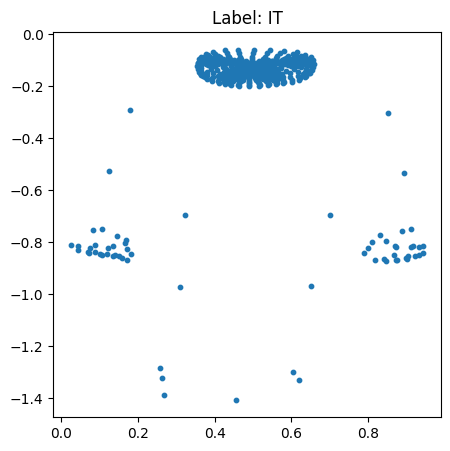

In [17]:
import matplotlib.pyplot as plt

sample = X[i, 0]  # first frame
x = sample[:, 0]
y_ = sample[:, 1]

plt.figure(figsize=(5,5))
plt.scatter(x, -y_, s=10)  # invert y for better pose
plt.title(f"Label: {y[i]}")
plt.show()


In [2]:
import numpy as np
y = np.load('../data/landmarks_norm/y.npy')
import collections
c = collections.Counter(y)
print(c)


Counter({'Good_afternoon': 20, 'I': 20, 'Good': 20, 'IT': 20, 'Loud': 20, 'Good_morning': 20, 'Bad': 20, 'Quiet': 20, 'She': 20, 'He': 20, 'How_are_you': 20, 'Hello': 20, 'happy': 20, 'Blind': 20, 'You': 20, 'Alright': 19, 'Deaf': 15, 'Beautiful': 13, 'Ugly': 13, 'Sad': 13})
